#Task

Take the MovieLens dataset and build a matrix factorization model. In this library, it is referred to as SVD. Tune the best parameters using cross-validation and also experiment with other computation algorithms (SVD++, NMF) and select the one that is optimal.

In [ ]:
pip install surprise

In [2]:
from surprise import Dataset, Reader, SVD, SVDpp, NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [ ]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

Load the MovieLens 100k dataset.

In [ ]:
data = Dataset.load_builtin('ml-100k')

Create instances of the SVD, SVD++, and NMF algorithms

In [5]:
algo_svd = SVD()
algo_svdpp = SVDpp()
algo_nmf = NMF()

Perform cross-validation for the SVD, SVD++, NMF algorithm

In [6]:
cv_results_svd = cross_validate(algo_svd, data, measures=['RMSE'], cv=3, verbose=True)
cv_results_svdpp = cross_validate(algo_svdpp, data, measures=['RMSE'], cv=3, verbose=True)
cv_results_nmf = cross_validate(algo_nmf, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9457  0.9410  0.9470  0.9446  0.0026  
Fit time          0.86    0.87    0.78    0.84    0.04    
Test time         0.22    0.16    0.22    0.20    0.03    
Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9341  0.9263  0.9251  0.9285  0.0040  
Fit time          20.96   17.04   17.21   18.40   1.81    
Test time         7.61    5.81    6.20    6.54    0.78    
Evaluating RMSE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9713  0.9717  0.9775  0.9735  0.0028  
Fit time          1.30    1.34    1.35    1.33    0.02    
Test time         0.19    0.19    0.12    0.17    0.04    


Calculate the mean RMSE for each algorithm

In [7]:
rmse_svd = cv_results_svd['test_rmse'].mean()
rmse_svdpp = cv_results_svdpp['test_rmse'].mean()
rmse_nmf = cv_results_nmf['test_rmse'].mean()

In [8]:
print(f"SVD:{rmse_svd}")
print(f"SVD++:{rmse_svdpp}")
print(f"NMF:{rmse_nmf}")

SVD:0.9445706903791763
SVD++:0.9284762458764289
NMF:0.9734925669504956


##__Conclusion:__

From these results, it can be seen that SVD++ has the lowest RMSE, indicating that this algorithm may be optimal for the MovieLens dataset. SVD also shows good performance, but SVD++ slightly outperforms it in terms of accuracy.

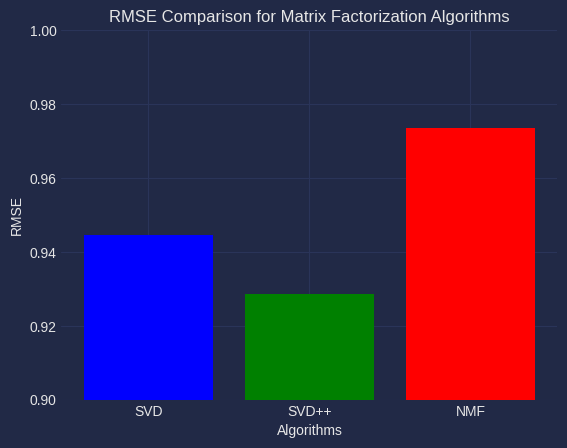

In [9]:
rmse_values = [rmse_svd, rmse_svdpp, rmse_nmf]
algorithms = ['SVD', 'SVD++', 'NMF']
plt.bar(algorithms, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Matrix Factorization Algorithms')
plt.ylim(0.9, 1.0)
plt.show()